## Find Homorhythm

#### This function predicts homorhythmic passages in a given piece.
    
The method follows various stages:
- gets **durational ngrams**, and finds passages in which these are the same in **more than two voices at a given offsets**
- gets **lyric ngrams**, and finds passages in which the **same sequence of two syllables** are heard successively in at least two voices at the **same offsets**.
- checks the **number of active voices** (so that we can count the number moving on coordinated homorhythm

to call the method:  

```
piece.homorhythm()
```

It is also possible to specify the length of the durational and lyric ngrams found in this method.  The default is 4.
The argument `full_hr=True` will return HR passages of three or more voices.  `full_hr=False` returns even passages with just two voices in HR

Typical use:

```
piece.homorhythm(ngram_length=4, full_hr=True)
```



##### View Score Excerpts with Verovio in the NB

It is also possible to display the results of the Homorhythm method in the Notebook with Verovio. The excerpts vary in length. Sometimes the same measure is part of overlapping groups--more work is pending to solve this problem.

The function also displays metadata about each excerpt: piece ID, composer, title, measures, and the minimum and maximum of voices in each passage moving in coordinated durations and syllables.

To use the function, pass the piece, homorhythm data frame, url of the piece, and mei_file name (all loaded in the first part of this notebook) as follows:

```
piece.verovioHomorhythm()
```

#### Corpus with Verovio

- Currently this is done as follows:

Define corpus_list of file names

* Read the documentation:  `print(piece.homorhythm.__doc__)`



In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import pandas as pd
import re
import os
import numpy
import itertools
# import collections
MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## Import Your Piece

- Here you will want to select the appropriate 'prefix' that identifies the location of your file.
- `'Music_Files/'` is for files in the local notebook; `'https://crimproject.org/mei/'` is for the files on CRIM.
- Then provide the full name (and extension) of your music file, such as `'CRIM_Model_0038.mei'`

In [15]:
# Select a prefix:

# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/'

# Add your filename here

mei_file = 'CRIM_Model_0002.mei'

url = prefix + mei_file

piece = importScore(url)

print(piece.metadata)

{'title': 'O gente brunette', 'composer': 'Thomas Champion', 'date': 1548}


In the background we look for lyric and durational ngrams

In [26]:
lyrics = piece.lyrics()
lyrics = lyrics.applymap(piece._alpha_only)
lyr_ng = piece.ngrams(df=lyrics, n=4, exclude=[])
lyr_ng

,Superius,Contratenor,Tenor,Bassus
0.0,"(O, gen, te, bru)","(O, gen, te, bru)","(O, gen, te, bru)","(O, gen, te, bru)"
1.0,"(gen, te, bru, net)","(gen, te, bru, net)","(gen, te, bru, net)","(gen, te, bru, net)"
2.0,"(te, bru, net, te)","(te, bru, net, te)","(te, bru, net, te)","(te, bru, net, te)"
3.0,"(bru, net, te, que)","(bru, net, te, que)","(bru, net, te, que)","(bru, net, te, que)"
4.0,"(net, te, que, Dieu)","(net, te, que, Dieu)","(net, te, que, Dieu)","(net, te, que, Dieu)"
...,...,...,...,...
254.0,NaN,NaN,NaN,"(en, ma, cham, bret)"
255.0,NaN,"(mon, aise, en, ma)","(mon, aise, en, ma)",NaN
256.0,"(en, ma, cham, bret)","(aise, en, ma, cham)","(aise, en, ma, cham)","(ma, cham, bret, te)"
258.0,"(ma, cham, bret, te)","(en, ma, cham, bret)","(en, ma, cham, bre)",NaN


In [21]:
nr = piece.notes()
dur = piece.durations(df=nr)

# add ng = exclude=[] to arguments in ngrams
# specify ngram length with arguments
ng = piece.ngrams(df=dur, n=4, exclude=[])
ng

,Superius,Contratenor,Tenor,Bassus
0.0,"(1.0, 1.0, 1.0, 1.0)","(1.0, 1.0, 1.0, 1.0)","(1.0, 1.0, 1.0, 1.0)","(1.0, 1.0, 1.0, 1.0)"
1.0,"(1.0, 1.0, 1.0, 2.0)","(1.0, 1.0, 1.0, 2.0)","(1.0, 1.0, 1.0, 2.0)","(1.0, 1.0, 1.0, 2.0)"
2.0,"(1.0, 1.0, 2.0, 2.0)","(1.0, 1.0, 2.0, 2.0)","(1.0, 1.0, 2.0, 2.0)","(1.0, 1.0, 2.0, 2.0)"
3.0,"(1.0, 2.0, 2.0, 2.0)","(1.0, 2.0, 2.0, 1.0)","(1.0, 2.0, 2.0, 1.0)","(1.0, 2.0, 2.0, 3.0)"
4.0,"(2.0, 2.0, 2.0, 1.0)","(2.0, 2.0, 1.0, 2.0)","(2.0, 2.0, 1.0, 1.0)","(2.0, 2.0, 3.0, 1.0)"
...,...,...,...,...
259.0,NaN,NaN,NaN,"(1.0, 2.0, 2.0, 4.0)"
260.0,"(1.0, 1.0, 4.0, 2.0)","(2.0, 2.0, 4.0, 16.0)","(2.0, 1.0, 1.0, 4.0)","(2.0, 2.0, 4.0, 16.0)"
261.0,"(1.0, 4.0, 2.0, 16.0)",NaN,NaN,NaN
262.0,"(4.0, 2.0, 16.0, 2.0)","(2.0, 4.0, 16.0, 2.0)","(1.0, 1.0, 4.0, 16.0)","(2.0, 4.0, 16.0, 2.0)"


In [16]:
# hr = piece.homorhythm()
# # len(hr)
# hr = piece.emaAddresses(df=hr, mode='h')
# hr.iloc[0]['ema']

In [27]:
# now with longer ngrams

piece.homorhythm(ngram_length=4, full_hr=True).head()

active_voices  number_dur_ngrams  \
Measure Beat Offset                                     
1       1.0  0.0               4.0                1.0   
        2.0  1.0               4.0                1.0   
        3.0  2.0               4.0                1.0   
2       8.0  15.0              2.0                1.0   
5       5.0  36.0              3.0                1.0   

                                                  hr_voices  \
Measure Beat Offset                                           
1       1.0  0.0     [Superius, Contratenor, Tenor, Bassus]   
        2.0  1.0     [Superius, Contratenor, Tenor, Bassus]   
        3.0  2.0     [Superius, Contratenor, Tenor, Bassus]   
2       8.0  15.0                        [Superius, Bassus]   
5       5.0  36.0              [Contratenor, Tenor, Bassus]   

                                Superius          Contratenor  \
Measure Beat Offset                                             
1       1.0  0.0       (O, gen, te, bru)    (O, gen, te, bru)   
        2.0  1.0     (gen, te, bru, net)  (gen, te, bru, net)   
        3.0  2.0      (te, bru, net, te)   (te, bru, net, te)   
2       8.0  15.0     (ras, tu, se, ras)                  NaN   
5       5.0  36.0                    NaN  (et, te, Sou, vent)   

                                   Tenor               Bassus  \
Measure Beat Offset                                             
1       1.0  0.0       (O, gen, te, bru)    (O, gen, te, bru)   
        2.0  1.0     (gen, te, bru, net)  (gen, te, bru, net)   
        3.0  2.0      (te, bru, net, te)   (te, bru, net, te)   
2       8.0  15.0                    NaN   (ras, tu, se, ras)   
5       5.0  36.0    (et, te, Sou, vent)  (et, te, Sou, vent)   

                                                          syllable_set  \
Measure Beat Offset                                                      
1       1.0  0.0     [(O, gen, te, bru), (O, gen, te, bru), (O, gen...   
        2.0  1.0     [(gen, te, bru, net), (gen, te, bru, net), (ge...   
        3.0  2.0     [(te, bru, net, te), (te, bru, net, te), (te, ...   
2       8.0  15.0             [(ras, tu, se, ras), (ras, tu, se, ras)]   
5       5.0  36.0    [(et, te, Sou, vent), (et, te, Sou, vent), (et...   

                     count_lyr_ngrams  active_syll_voices voice_match  \
Measure Beat Offset                                                     
1       1.0  0.0                  1.0                 4.0        True   
        2.0  1.0                  1.0                 4.0        True   
        3.0  2.0                  1.0                 4.0        True   
2       8.0  15.0                 1.0                 2.0        True   
5       5.0  36.0                 1.0                 3.0        True   

                     ngram_length  Progress  
Measure Beat Offset                          
1       1.0  0.0              4.0  0.000000  
        2.0  1.0              4.0  0.003521  
        3.0  2.0              4.0  0.007042  
2       8.0  15.0             4.0  0.052817  
5       5.0  36.0             4.0  0.126761

### Print the Results with Verovio

- Note that it's possible to use all of the same arguments as noted above.

[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'


Results:
File Name:  CRIM_Model_0002
Thomas Champion
O gente brunette
HR Start Measure:  1
HR Stop Measure:  2
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  4


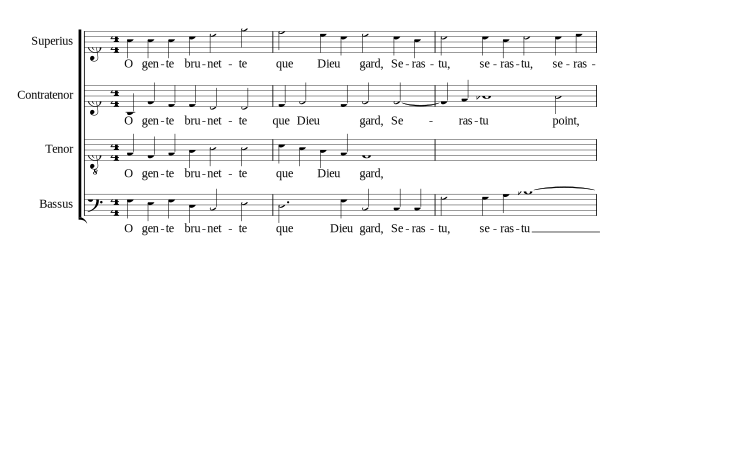

Results:
File Name:  CRIM_Model_0002
Thomas Champion
O gente brunette
HR Start Measure:  4
HR Stop Measure:  6
Minimum Number of HR Voices:  3
Maximum Number of HR Voices:  4


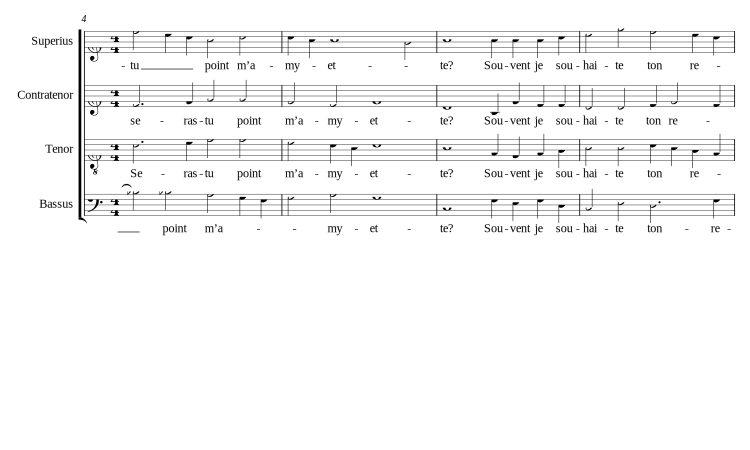

Results:
File Name:  CRIM_Model_0002
Thomas Champion
O gente brunette
HR Start Measure:  8
HR Stop Measure:  9
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  3


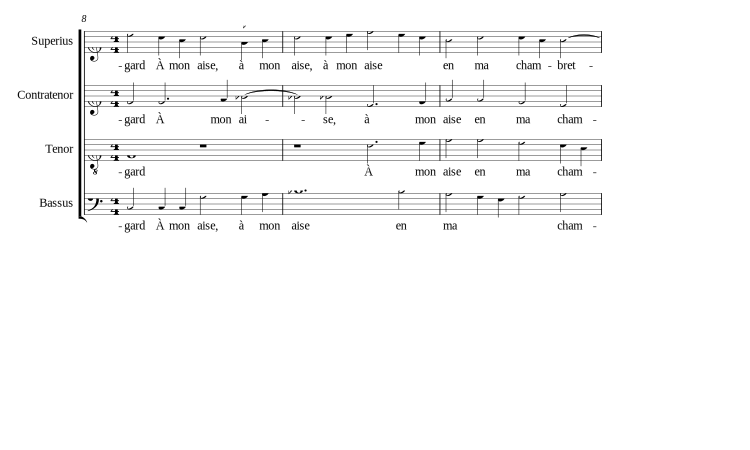

Results:
File Name:  CRIM_Model_0002
Thomas Champion
O gente brunette
HR Start Measure:  11
HR Stop Measure:  15
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


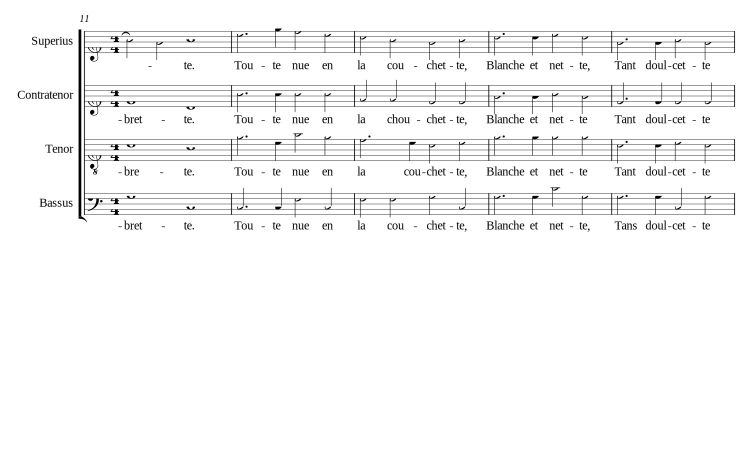

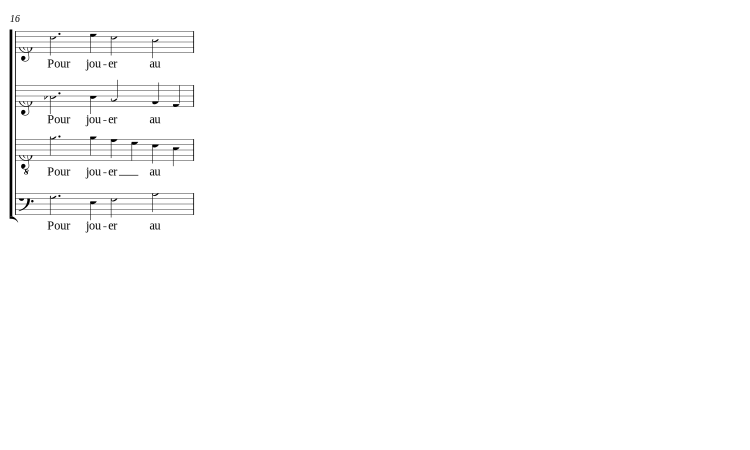

Results:
File Name:  CRIM_Model_0002
Thomas Champion
O gente brunette
HR Start Measure:  17
HR Stop Measure:  21
Minimum Number of HR Voices:  3
Maximum Number of HR Voices:  4


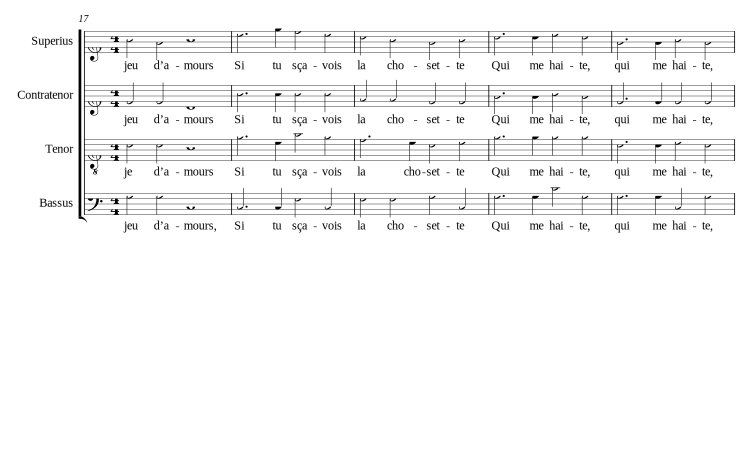

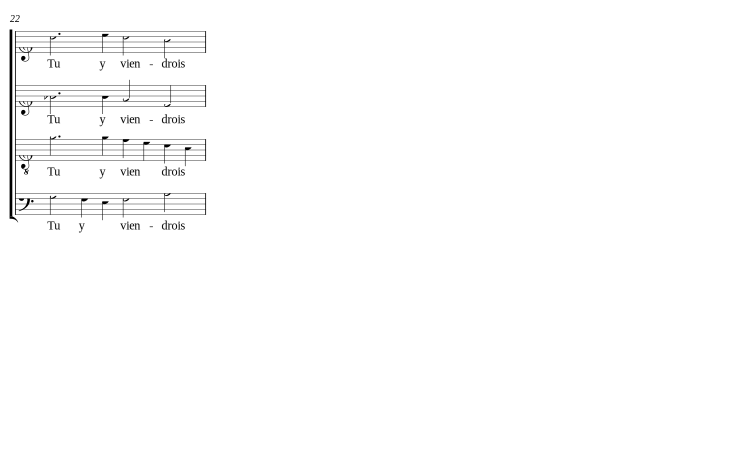

Results:
File Name:  CRIM_Model_0002
Thomas Champion
O gente brunette
HR Start Measure:  23
HR Stop Measure:  24
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


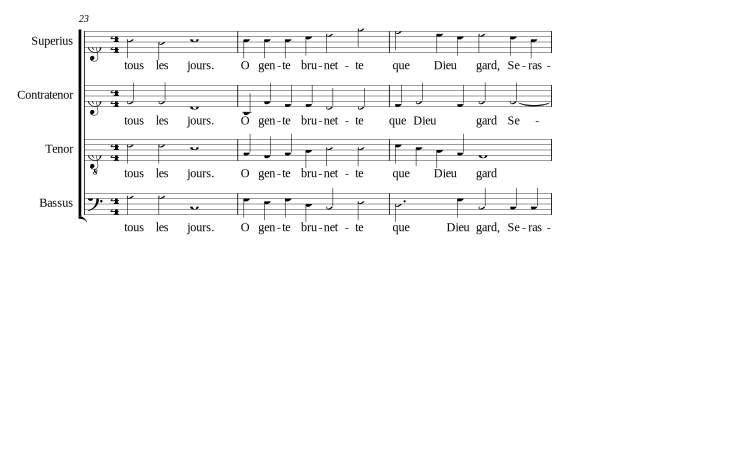

Results:
File Name:  CRIM_Model_0002
Thomas Champion
O gente brunette
HR Start Measure:  27
HR Stop Measure:  29
Minimum Number of HR Voices:  3
Maximum Number of HR Voices:  4


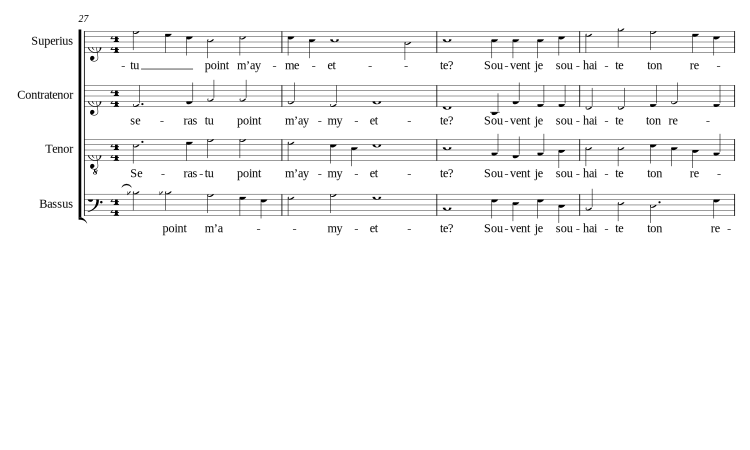

Results:
File Name:  CRIM_Model_0002
Thomas Champion
O gente brunette
HR Start Measure:  31
HR Stop Measure:  32
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  3


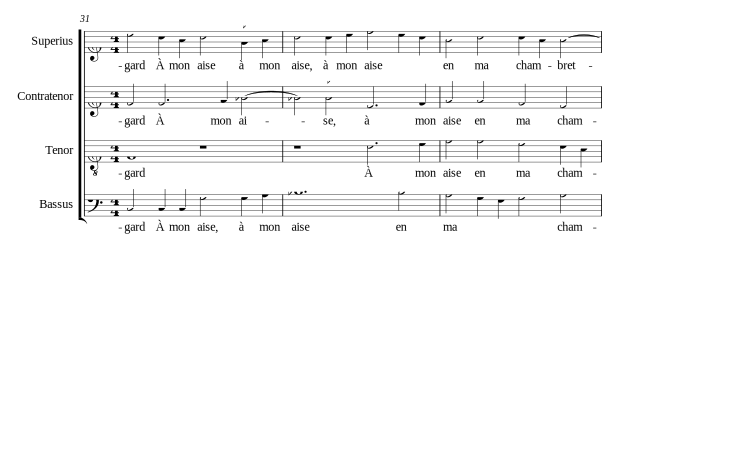

In [28]:
piece.verovioHomorhythm(ngram_length=3, full_hr=True)

### Corpus and Homorhythm

Define the corpus list:

```
corpus_list = ['https://crimproject.org/mei/CRIM_Model_0011.mei',
              'https://crimproject.org/mei/CRIM_Model_0012.mei']
```

Import corpus:

```
corpus  = CorpusBase(corpus_list)
```

Set the length with 'ngram_length' and 'full_hr'  as True or False:

```
func = ImportedPiece.homorhythm
list_of_hr = corpus.batch(func=func, kwargs={'ngram_length' : 8, "full_hr" : True}, metadata=True)

combined_df = pd.concat(list_of_hr, ignore_index=False)
combined_df.head(10)
```



In [ ]:
corpus_list = ['https://crimproject.org/mei/CRIM_Model_0011.mei',
              'https://crimproject.org/mei/CRIM_Model_0012.mei']
corpus_list

In [ ]:
corpus  = CorpusBase(corpus_list)

In [ ]:
# set the length with 'ngram_length'
# set full_hr  as True or False

func = ImportedPiece.homorhythm
list_of_hr = corpus.batch(func=func, kwargs={'ngram_length' : 8, "full_hr" : True}, metadata=True)

combined_df = pd.concat(list_of_hr, ignore_index=False)
combined_df.head(10)

### Render HR Corpus with Verovio

Define the corpus list:

```
corpus_list = ['https://crimproject.org/mei/CRIM_Model_0011.mei',
              'https://crimproject.org/mei/CRIM_Model_0012.mei']
```
Call print function for each piece individually via 'for' loop:

```
for url in corpus_list:
    piece = importScore(url)
    piece.verovioHomorhythm(ngram_length=8, full_hr=True)
```

In [ ]:
for url in corpus_list:
    piece = importScore(url)
    piece.verovioHomorhythm(ngram_length=8, full_hr=True)

